# SiPM Data Analysis

Script to load and processes KETEK PM3315 SiPM signals from an oscilloscpe. The program:

Histograms the Pulse Height and Charge of signals at varying Bias Voltage in dark / illuminated conditions

Fits Gaussian Curves to find 0PE and 1PE signals

Calculates the DCR, Gain and Signal-Noise Ratio at varying Bias Voltage

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
plt.rcParams["figure.figsize"] = (14,7)


In [2]:
plt.rcParams.update({'font.size': 22})
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

# 0405_DCR
Visual example of data analysis. We calculate and histogram the lowest voltage point within each time bin

In [84]:
data_0405_sample=np.loadtxt(r"C:\Users\Lucas\My Drive\Fourth Year\Research Project\Data\0405_DCR.txt", delimiter=",",skiprows=1,max_rows=100)

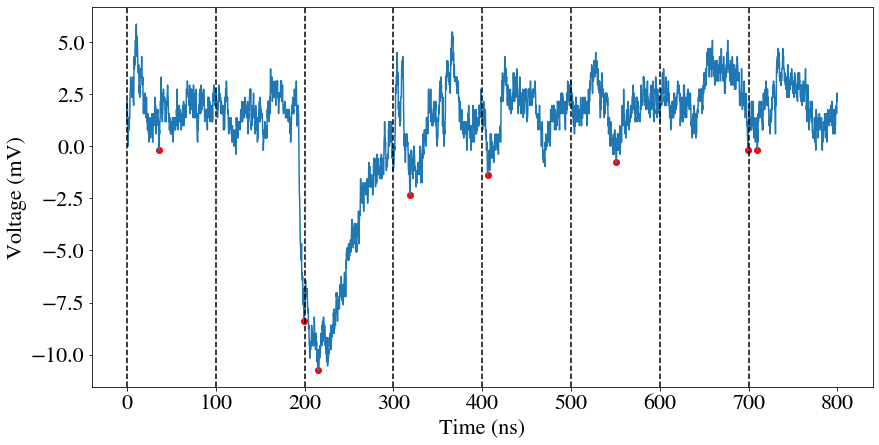

In [752]:
plt.plot(np.arange(0,800,0.2),1000*data_0405_sample[64][0:4000])
for i in range(8):
    plt.axvline((i*100), linestyle='--', color='k');
for j in range(8):
    min_v=np.amin(data_0405_sample[64][j*500:(j+1)*500])
    min_t=np.argwhere(data_0405_sample[64][j*500:(j+1)*500]==min_v)
    plt.scatter(0.2*(min_t[0]+500*j),1000* min_v, color='red')

plt.xlabel("Time (ns)")
plt.ylabel("Voltage (mV)")


# $V_{bias}$= 30.494 V


Loading Data


In [11]:
data_0505_1=np.loadtxt(r"C:\Users\Lucas\My Drive\Fourth Year\Research Project\Data\0505_DCR.txt", delimiter=",",skiprows=1,max_rows=25000)
data_0505_2=np.loadtxt(r"C:\Users\Lucas\My Drive\Fourth Year\Research Project\Data\0505_DCR.txt", delimiter=",",skiprows=25001)
data_0505_tot=np.concatenate((data_0505_1,data_0505_2),axis=0)
data_0505_header=np.loadtxt(r"C:\Users\Lucas\My Drive\Fourth Year\Research Project\Data\0505_DCR.txt", delimiter=",",max_rows=1)

Seperating into time gates & finding minimum


In [21]:
data_0505_gate=np.reshape(data_0505_tot[:,0:12000],(3000000,200))

In [15]:
min_V_0505_gate=np.amin(data_0505_gate,axis=1)

Calculating Charge in a time gate

In [23]:
q_0505_gate=np.trapz(data_0505_gate)

Histogram of Pulse Height

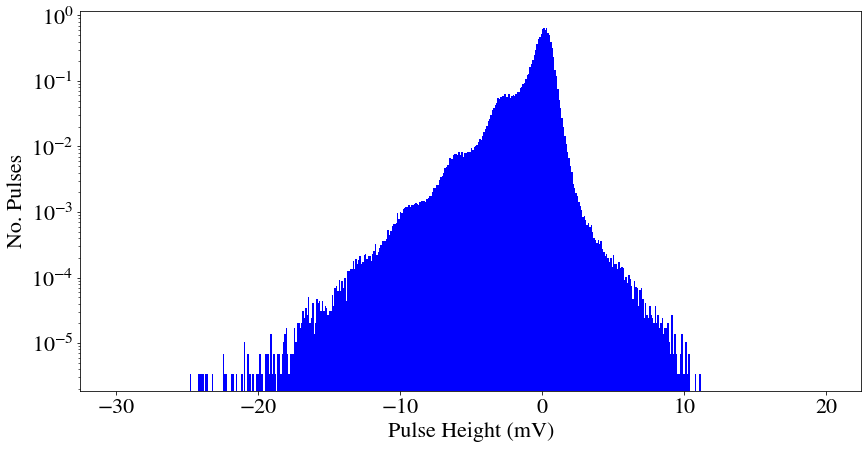

In [87]:
plt.hist(1000*min_V_0505_gate,bins=np.arange(-30,20,0.098),log=True, density=True, color = "blue")
plt.xlabel("Pulse Height (mV)")
plt.ylabel("No. Pulses")

Probability Pulse Height < Threshold

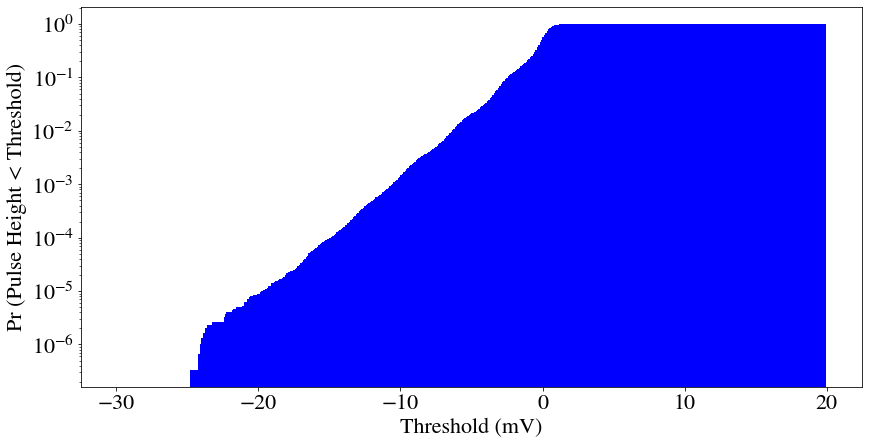

In [39]:
plt.hist(1000*min_V_0505_gate,bins=np.arange(-30,20,0.098),log=True, density=True, label='SSPM', cumulative=True, color = "blue");
plt.xlabel("Threshold (mV)")
plt.ylabel("Pr (Pulse Height < Threshold)")

Histogram of Charge

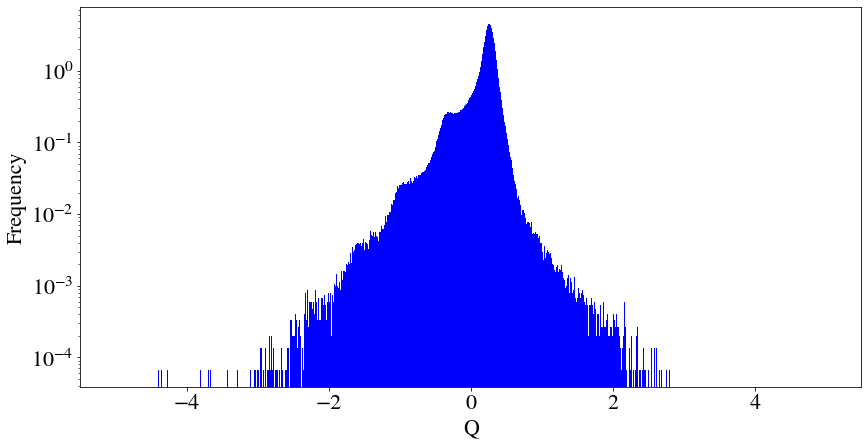

In [86]:
plt.hist(q_0505_gate,bins=np.arange(-5,5,0.005),log=True, density=True, color = "blue")
plt.xlabel("Q")
plt.ylabel("Frequency")

### Reshaping gate

In [30]:
min_V_0505_gate_big= np.amin(np.reshape(min_V_0505_gate,[600000,5]), axis=1)

Histogram of Pulse Heights with increased gate width

Text(0, 0.5, 'No. Pulses')

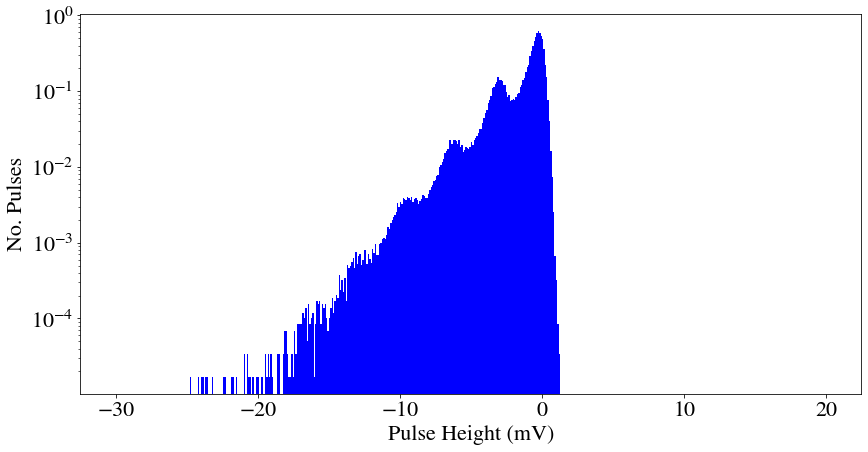

In [123]:
plt.hist(1000*min_V_0505_gate_big,bins=np.arange(-30,20,0.098),log=True, density=True, color = "blue")
plt.xlabel("Pulse Height (mV)")
plt.ylabel("No. Pulses")

# $V_{bias}$= 29.464 V


In [ ]:
data_1005_1=np.loadtxt(r"C:\Users\Lucas\My Drive\Fourth Year\Research Project\Data\1005_DCR.txt", delimiter=",",skiprows=1,max_rows=25000)
data_1005_2=np.loadtxt(r"C:\Users\Lucas\My Drive\Fourth Year\Research Project\Data\1005_DCR.txt", delimiter=",",skiprows=25001)
data_1005_tot=np.concatenate((data_1005_1,data_1005_2),axis=0)
data_1005_header=np.loadtxt(r"C:\Users\Lucas\My Drive\Fourth Year\Research Project\Data\1005_DCR.txt", delimiter=",",max_rows=1)

In [11]:
data_1005_gate=np.reshape(data_1005_tot[:,0:12000],(3000000,200))

In [12]:
min_V_1005_gate=np.amin(data_1005_gate,axis=1)

In [23]:
q_1005_gate=np.trapz(data_1005_gate)

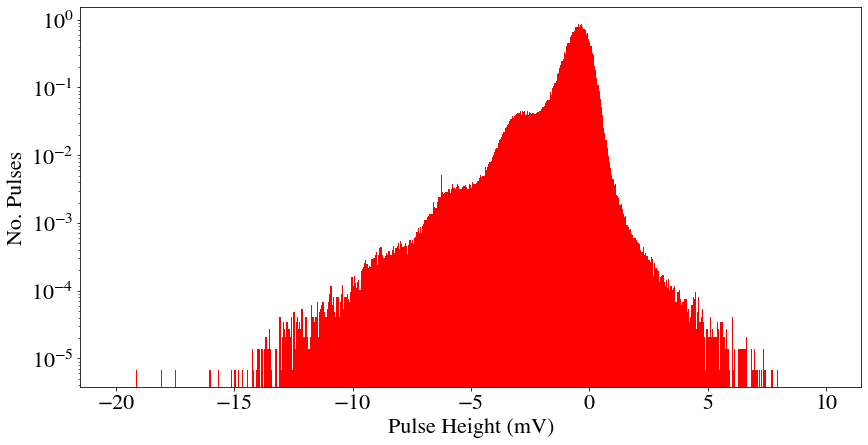

In [42]:
plt.hist(1000*min_V_1005_gate,bins=np.arange(-20,10,0.049),log=True, density=True, color = "red")
plt.xlabel("Pulse Height (mV)")
plt.ylabel("No. Pulses")

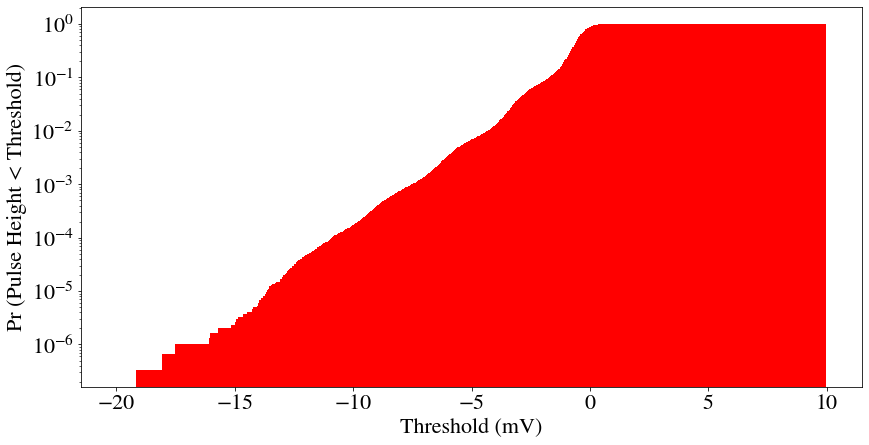

In [19]:
plt.hist(1000*min_V_1005_gate,bins=np.arange(-20,10,0.049),log=True, density=True, cumulative=True, color = "red");
plt.xlabel("Threshold (mV)")
plt.ylabel("Pr (Pulse Height < Threshold)")

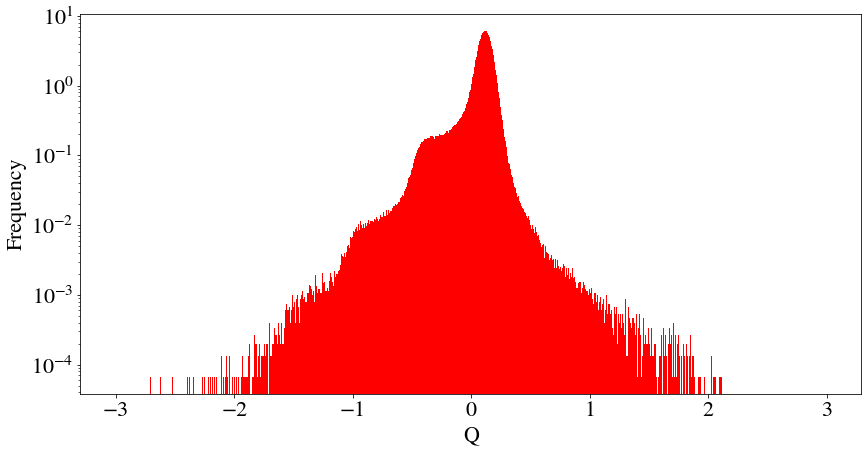

In [42]:
plt.hist(q_1005_gate,bins=np.arange(-3,3,0.005),log=True, density=True, color = "red")
plt.xlabel("Q")
plt.ylabel("Frequency")

### Reshaping gate

In [198]:
min_V_1005_gate_big= np.amin(np.reshape(min_V_1005_gate,[600000,5]), axis=1)

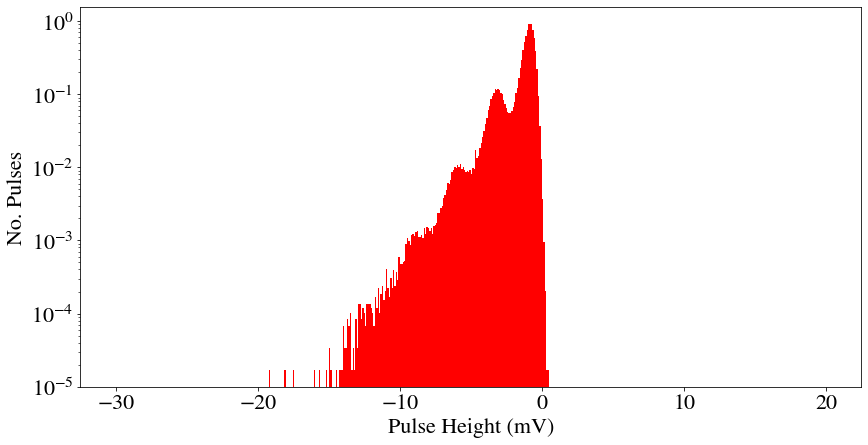

In [201]:
plt.hist(1000*min_V_1005_gate_big,bins=np.arange(-30,20,0.098),log=True, density=True, color = "red")
plt.xlabel("Pulse Height (mV)")
plt.ylabel("No. Pulses")

# $V_{bias}$= 31.508 V


In [529]:
min_V_1205_gate=np.load(r"C:\Users\Lucas\My Drive\Fourth Year\Research Project\Data\Numpy\min_V_1205_gate.npy")

In [12]:
q_1205_gate=np.load(r"C:\Users\Lucas\My Drive\Fourth Year\Research Project\Data\Numpy\q_1205_gate.npy")

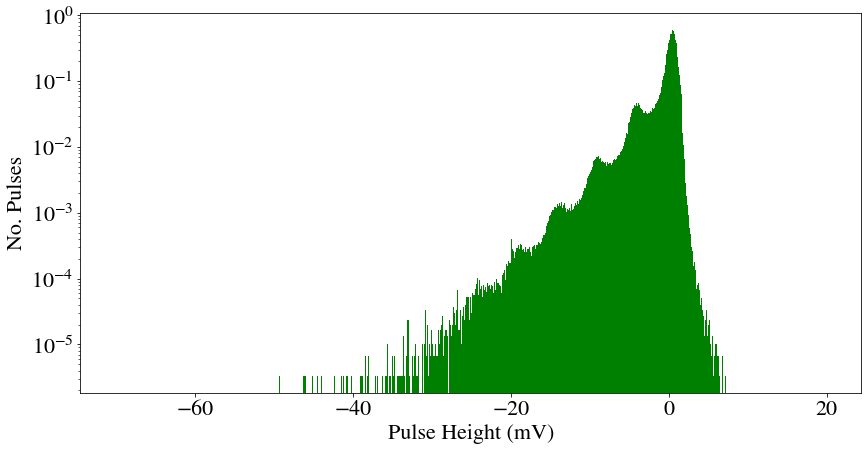

In [60]:
plt.hist(1000*min_V_1205_gate,bins=np.arange(-70,20,0.1),log=True, density=True,color='green')
plt.xlabel("Pulse Height (mV)")
plt.ylabel("No. Pulses")

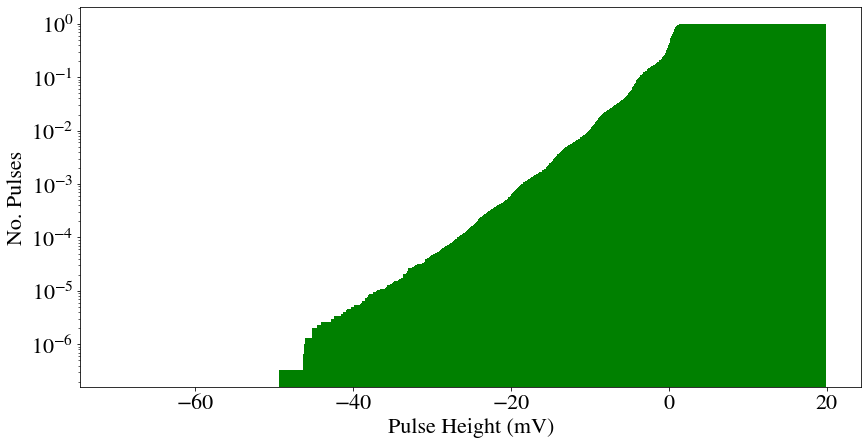

In [62]:
plt.hist(1000*min_V_1205_gate,bins=np.arange(-70,20,0.1),log=True, density=True,cumulative= True, color='green')
plt.xlabel("Pulse Height (mV)")
plt.ylabel("No. Pulses")

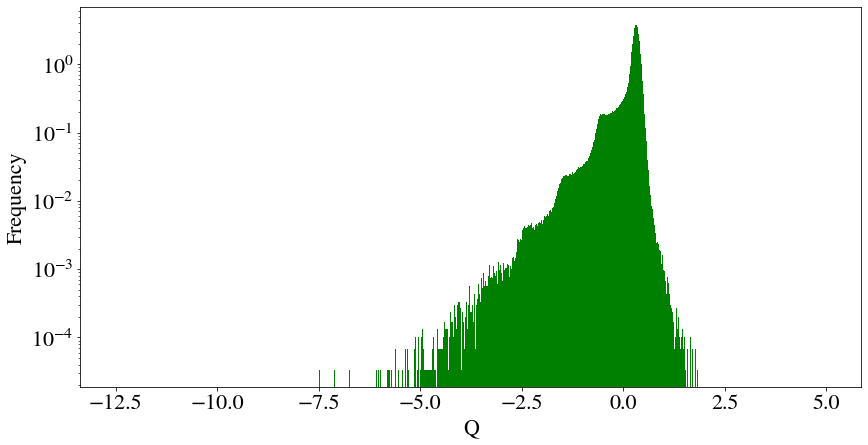

In [65]:
plt.hist(q_1205_gate,bins=np.arange(-12.5,5,0.01),log=True, density=True,color='green')
plt.xlabel("Q")
plt.ylabel("Frequency")

### Reshaping gate

In [227]:
min_V_1205_gate_big= np.amin(np.reshape(min_V_1205_gate,[600000,5]), axis=1)

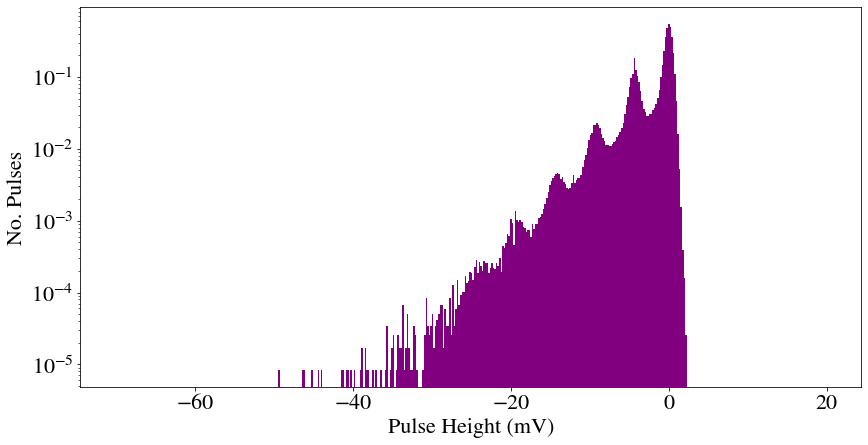

In [228]:
plt.hist(1000*min_V_1205_gate_big,bins=np.arange(-70,20,0.198),log=True, density=True, color = "purple")
plt.xlabel("Pulse Height (mV)")
plt.ylabel("No. Pulses")

# $V_{bias}$= 32.235 V


In [531]:
min_V_1105_gate=np.load(r"C:\Users\Lucas\My Drive\Fourth Year\Research Project\Data\Numpy\min_V_1105_gate.npy")

In [18]:
q_1105_gate=np.load(r"C:\Users\Lucas\My Drive\Fourth Year\Research Project\Data\Numpy\q_1105_gate.npy")

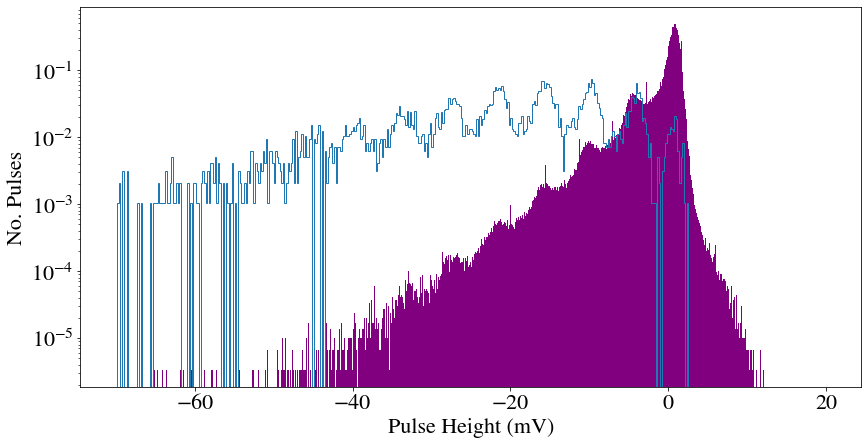

In [37]:
plt.hist(1000*min_V_1105_gate,bins=np.arange(-70,20,0.1),log=True, density=True,color='purple')
plt.xlabel("Pulse Height (mV)")
plt.ylabel("No. Pulses")

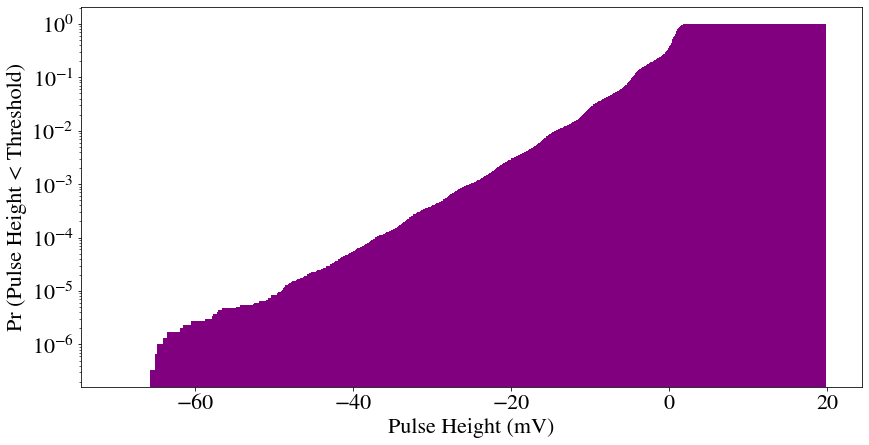

In [74]:
plt.hist(1000*min_V_1105_gate,bins=np.arange(-70,20,0.1),log=True, density=True, cumulative=True,color='purple')
plt.xlabel("Pulse Height (mV)")
plt.ylabel("Pr (Pulse Height < Threshold)")

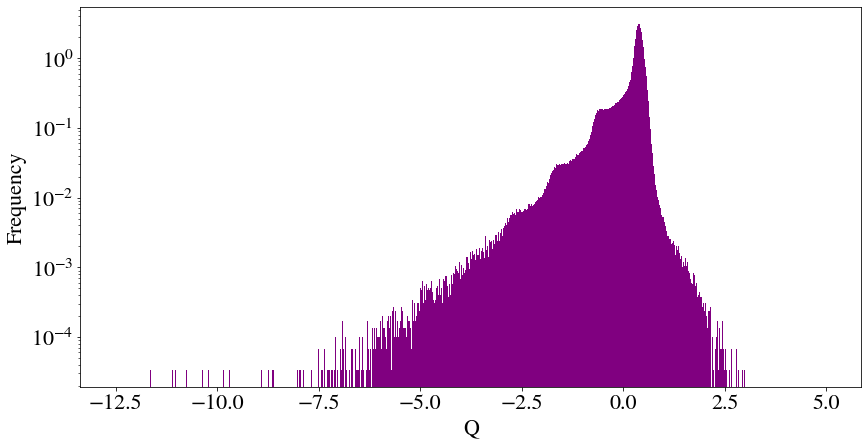

In [76]:
plt.hist(q_1105_gate,bins=np.arange(-12.5,5,0.01),log=True, density=True,color='purple')
plt.xlabel("Q")
plt.ylabel("Frequency")

### Reshaping gate

In [206]:
min_V_1105_gate_big= np.amin(np.reshape(min_V_1105_gate,[595068,5]), axis=1)

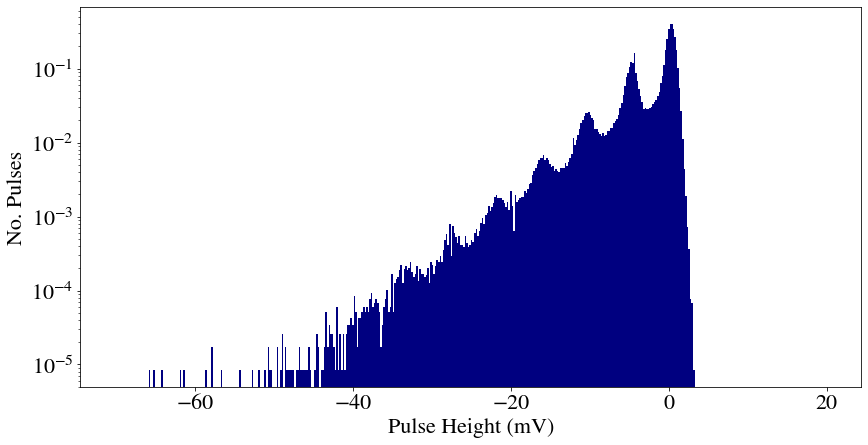

In [331]:
plt.hist(1000*min_V_1105_gate_big,bins=np.arange(-70,20,0.198),log=True, density=True, color = "navy")
plt.xlabel("Pulse Height (mV)")
plt.ylabel("No. Pulses")

 # Comparing Histograms at varying $V_{bias}$ 

Integrated Histograms at varying $V_{bias}$ with small gate

In [1]:
plt.hist(1000*min_V_1105_gate,bins=np.arange(-70,20,0.1),log=True, density=True, cumulative=True,color='purple', histtype='step', label = "32.235")
plt.hist(1000*min_V_1205_gate,bins=np.arange(-70,20,0.1),log=True, density=True,cumulative= True, color='green' ,histtype='step', label = "31.508")
plt.hist(1000*min_V_1005_gate,bins=np.arange(-70,20,0.049),log=True, density=True, cumulative=True, color = "red", histtype='step', label = "29.464")
plt.hist(1000*min_V_0505_gate,bins=np.arange(-70,20,0.098),log=True, density=True, cumulative=True, color = "blue", histtype='step', label = "30.494")
plt.xlabel("Threshold (mV)")
plt.ylabel("Pr (Pulse Height < Threshold)")
plt.legend(title='V$_{bias}$ (V)', loc ="upper left");

NameError: name 'plt' is not defined

Integrated Histograms at varying $V_{bias}$ with large gate

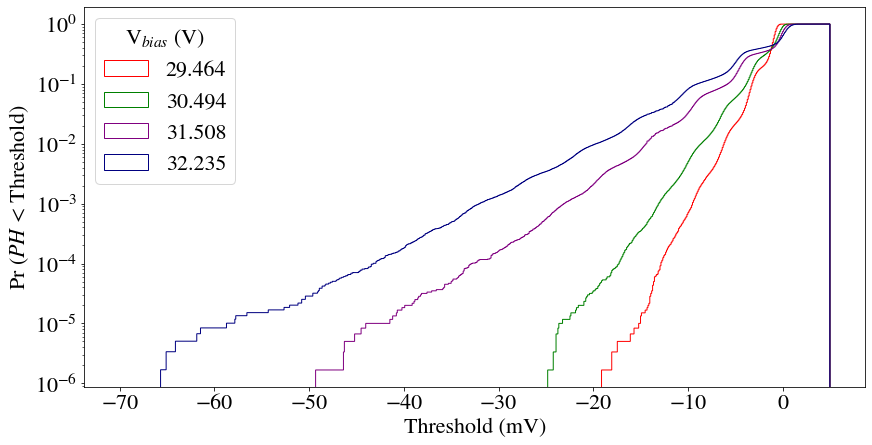

In [836]:
plt.hist(1000*min_V_1005_gate_big,bins=np.arange(-70,5,0.098),log=True, density=True, color = "red", cumulative = True, histtype='step', label = "29.464")
plt.hist(1000*min_V_0505_gate_big,bins=np.arange(-70,5,0.098),log=True, density=True, color = "green", cumulative = True, histtype='step',label = "30.494")
plt.hist(1000*min_V_1205_gate_big,bins=np.arange(-70,5,0.098),log=True, density=True, color = "purple", cumulative = True, histtype='step',label = "31.508")
plt.hist(1000*min_V_1105_gate_big,bins=np.arange(-70,5,0.098),log=True, density=True, color = "navy", cumulative = True, histtype='step', label = "32.235");
plt.xlabel("Threshold (mV)")
plt.ylabel("Pr ($PH$ < Threshold)")

plt.legend(title='V$_{bias}$ (V)', loc ="upper left");

# PM3315 laser

We now look at the signal from the SiPM when illuminated by a laser, at varying $V_{bias}$

In [2]:
#Defining a Gauss function to fit over PE spectrum
def gauss(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

Loading Data

In [5]:
laser_1205_1=np.loadtxt(r"C:\Users\Lucas\My Drive\Fourth Year\Research Project\Data\1205_laser_1.txt", delimiter=",",skiprows=1)
laser_1205_2=np.loadtxt(r"C:\Users\Lucas\My Drive\Fourth Year\Research Project\Data\1205_laser_2.txt", delimiter=",",skiprows=1)
laser_1205_3=np.loadtxt(r"C:\Users\Lucas\My Drive\Fourth Year\Research Project\Data\1205_laser_3.txt", delimiter=",",skiprows=1)
laser_1205_4=np.loadtxt(r"C:\Users\Lucas\My Drive\Fourth Year\Research Project\Data\1205_laser_4.txt", delimiter=",",skiprows=1)

Finding Pulse Height

In [28]:
laser_min_1 = np.amin(laser_1205_1[:,:1234], axis=1)
laser_min_2 = np.amin(laser_1205_2[:,:1234], axis=1)
laser_min_3 = np.amin(laser_1205_3[:,:1234], axis=1)
laser_min_4 = np.amin(laser_1205_4[:,:1234], axis=1)

# $V_{bias}$= 29.460 V


Plotting Histogram of Pulse Heights

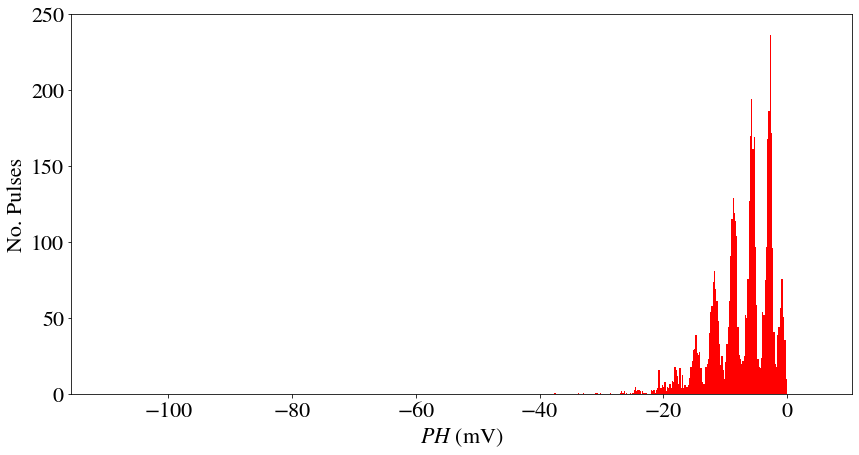

In [376]:
plt.hist(1000*laser_min_4, bins=np.arange(-110,5,0.2), label ='29.460', color='red')
plt.ylim((0,250))
plt.xlabel("$PH$ (mV)")
plt.ylabel("No. Pulses")


In [3]:
#Saving Histogram values in array
laser_4_hist=np.histogram(1000*laser_min_4,np.arange(-110,5,0.2))

NameError: name 'np' is not defined

Fitting Gaussian Curve over 0PE and 1 PE Peaks

In [371]:
#0PE
c_laser0_4, var_laser0_4 = curve_fit(gauss,0.5*(laser_4_hist[1][-34:-26]+laser_4_hist[1][-33:-25]), laser_4_hist[0][-33:-25], maxfev=8000)

In [372]:
#1PE
c_laser1_4, var_laser1_4 = curve_fit(gauss,0.5*(laser_4_hist[1][-50:-35]+laser_4_hist[1][-49:-34]), laser_4_hist[0][-49:-34], maxfev=8000)

# $V_{bias}$= 30.451 V


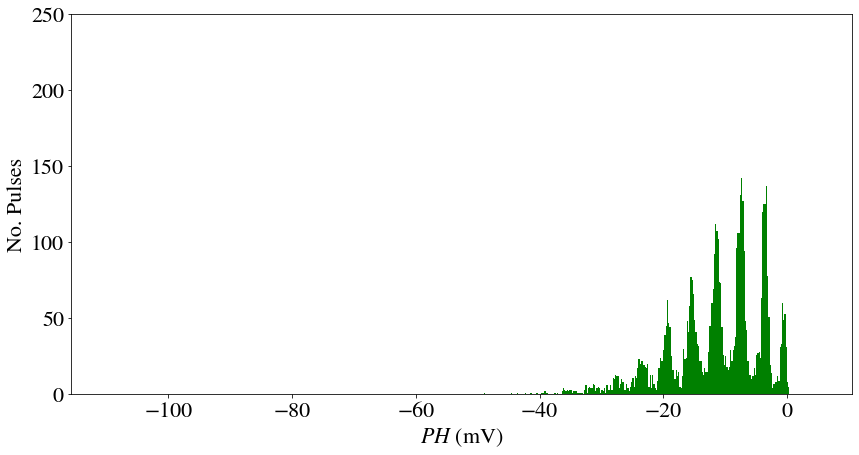

In [369]:
plt.hist(1000*laser_min_3, bins=np.arange(-110,5,0.2), label ='30.451', color='green')
plt.ylim((0,250))
plt.xlabel("$PH$ (mV)")
plt.ylabel("No. Pulses")


In [359]:
laser_3_hist=np.histogram(1000*laser_min_3,np.arange(-110,5,0.2))

In [362]:
c_laser0_3, var_laser0_3 = curve_fit(gauss,0.5*(laser_3_hist[1][-32:-25]+laser_3_hist[1][-31:-24]), laser_3_hist[0][-31:-24], maxfev=8000)

In [366]:
c_laser1_3, var_laser1_3 = curve_fit(gauss,0.5*(laser_3_hist[1][-47:-38]+laser_3_hist[1][-46:-37]), laser_3_hist[0][-46:-37], maxfev=8000)

# $V_{bias}$= 31.504 V


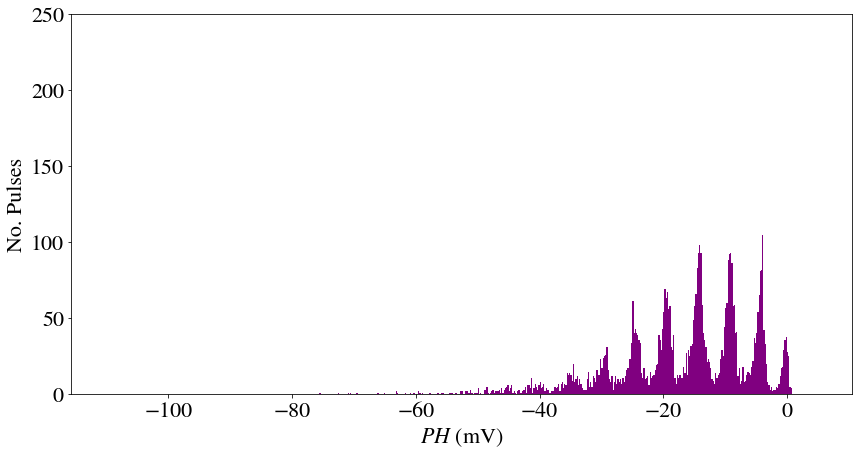

In [477]:
plt.hist(1000*laser_min_1, bins=np.arange(-110,5,0.2), label ='31.504', color='purple')
plt.ylim((0,250))
plt.xlabel("$PH$ (mV)")
plt.ylabel("No. Pulses")


In [377]:
laser_1_hist=np.histogram(1000*laser_min_1,np.arange(-110,5,0.2))

In [379]:
c_laser0_1, var_laser0_1 = curve_fit(gauss,0.5*(laser_1_hist[1][-33:-22]+laser_1_hist[1][-32:-21]), laser_1_hist[0][-32:-21], maxfev=8000)

In [380]:
c_laser1_1, var_laser1_1 = curve_fit(gauss,0.5*(laser_1_hist[1][-54:-41]+laser_1_hist[1][-53:-40]), laser_1_hist[0][-53:-40], maxfev=8000)

# $V_{bias}$= 32.232 V


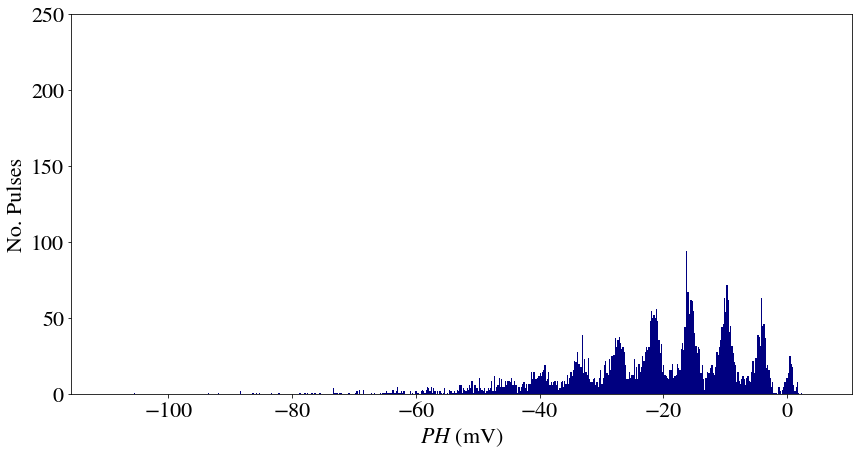

In [478]:
plt.hist(1000*laser_min_2, bins=np.arange(-110,5,0.2), label ='32.232', color='navy')
plt.ylim((0,250))
plt.xlabel("$PH$ (mV)")
plt.ylabel("No. Pulses")


In [385]:
laser_2_hist=np.histogram(1000*laser_min_2,np.arange(-110,5,0.2))

In [388]:
c_laser0_2, var_laser0_2 = curve_fit(gauss,0.5*(laser_2_hist[1][-31:-16]+laser_2_hist[1][-30:-15]), laser_2_hist[0][-30:-15], maxfev=8000)

In [389]:
c_laser1_2, var_laser1_2 = curve_fit(gauss,0.5*(laser_2_hist[1][-55:-38]+laser_2_hist[1][-54:-37]), laser_2_hist[0][-54:-37], maxfev=8000)

# Gain
We calculate the gain as the difference in voltage between the 1PE and 0PE peaks, for each $V_{bias}$

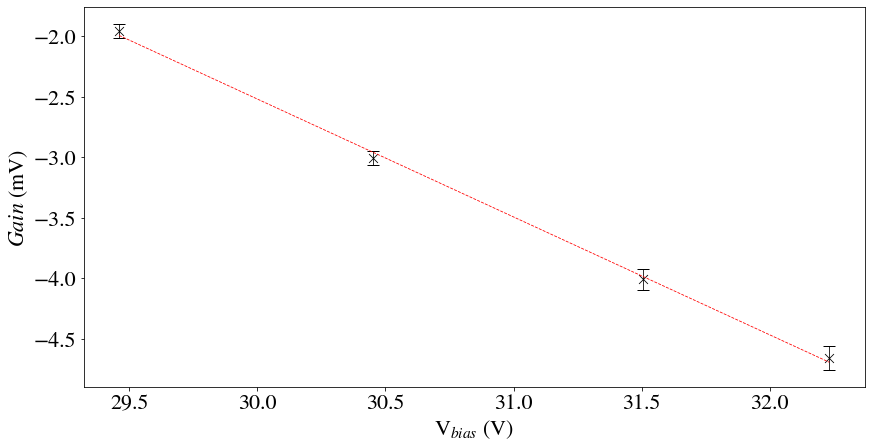

In [898]:
#Our x values are the V_bias we record data at
x=np.array([29.460,30.451,31.504,32.232])

#Our y values are the Gain
y=[c_laser1_4[1]-c_laser0_4[1], c_laser1_3[1]-c_laser0_3[1],c_laser1_1[1]-c_laser0_1[1],c_laser1_2[1]-c_laser0_2[1]]
err= np.sqrt([var_laser0_4[1,1] + var_laser1_4[1,1], var_laser0_3[1,1] + var_laser1_3[1,1], var_laser0_1[1,1] + var_laser1_1[1,1], var_laser0_2[1,1] + var_laser1_2[1,1]])

plt.scatter(x, y, marker ='x', color='k', lw=0.8, s=80)
plt.errorbar(x,y,yerr=err, ls='none', color='k', lw=0.8, capsize=6)

#Fitting a straight line
a, b = np.polyfit(x, y, 1)
plt.plot(x, a*x +b, lw=0.8, ls='--', color='red')
plt.xlabel("V$_{bias}$ (V)")
plt.ylabel("$Gain$ (mV)")


# DCR
We calulate the Dark Count Rate of the SiPM at varying $V_{bias}$

The DCR is defined by $DCR = \frac{-\ln(f_{<0.5})}{\tau_{gate}}$

Where $f_{<0.5}$ is the fraction of events in the 0PE peak

In [497]:
#Saving Histograms of Pulse Heights in dark as arrays
#29V
hist_1005=np.histogram(1000*min_V_1005_gate_big,np.arange(-70,5,0.199))
#30V
hist_0505=np.histogram(1000*min_V_0505_gate_big,np.arange(-70,5,0.199))
#31V
hist_1205=np.histogram(1000*min_V_1205_gate_big,np.arange(-70,5,0.199))
#32V
hist_1105=np.histogram(1000*min_V_1105_gate_big,np.arange(-70,5,0.199))

In [548]:
#Calculating f<0.5 for varying v_bias
#29V
f_1005 = np.sum(hist_1005[0][343:])/600000
#30V
f_0505 = np.sum(hist_0505[0][342:])/600000
#31V
f_1205 = np.sum(hist_1205[0][341:])/600000
#32V
f_1105 = np.sum(hist_1105[0][343:])/595068

In [749]:
#Calculating array of DCR at varying V_bias
DCR_PM3315= -np.log([f_1005,f_0505,f_1205,f_1105])/(2*10**-7)

Plot of DCR vs $V_{bias}$

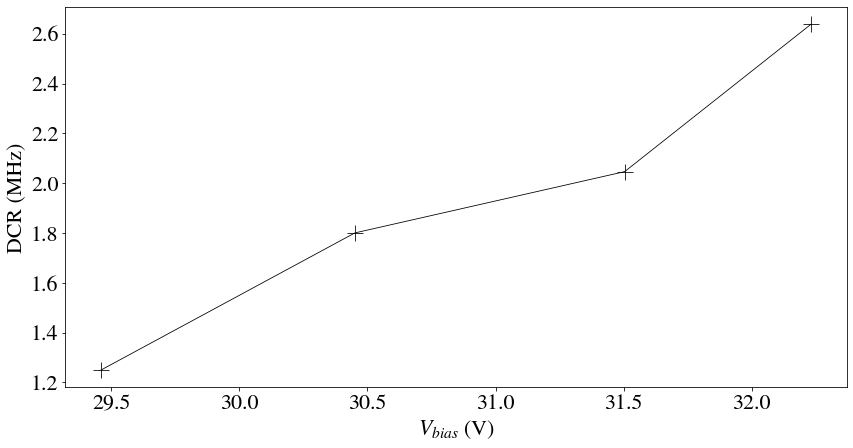

In [750]:
plt.scatter(x,DCR_PM3315/1000000, marker='+', color='k', s = 250, lw= 0.8)
plt.plot(x,DCR_PM3315/1000000,color='k',lw= 0.8)
plt.xlabel("$V_{bias}$ (V)")
plt.ylabel("DCR (MHz)")

# PDE

We next calculate the Photon Detetion Efficiency be finding $\langle N_{\gamma} \rangle$, the average number of photon detected in eahc laser signal.

In this case,  $\langle N_{\gamma} \rangle = - \ln(\frac{f_{<0.5, laser}}{f_{<0.5,DC}})$

In [466]:
#Finding f_0.5,laser for varying v_bias

#29V
f0_1= np.sum(laser_1_hist[0][539:])/5000
#30V
f0_2= np.sum(laser_2_hist[0][541:])/5000
#31V
f0_3= np.sum(laser_3_hist[0][540:])/5000
#32V
f0_4= np.sum(laser_4_hist[0][541:])/5000

In [808]:
N_gamma = -np.log([f0_4/f_1005,f0_3/f_0505,f0_1/f_1205,f0_2/f_1105])

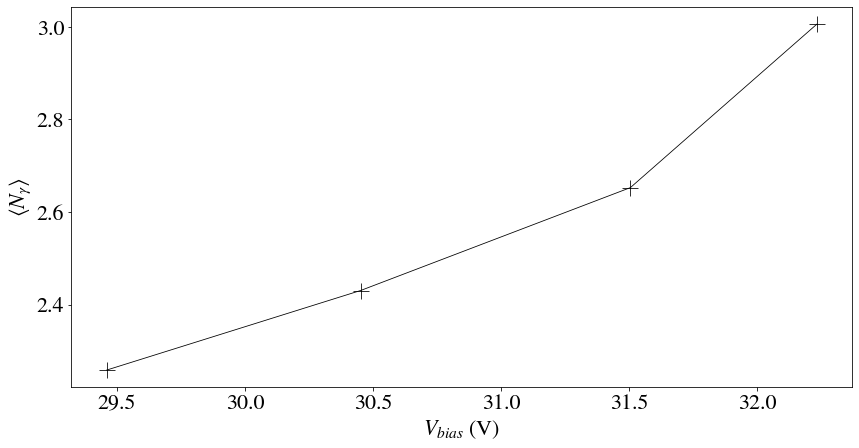

In [809]:
plt.scatter(x, N_gamma, marker='+', color = 'k', s = 250, lw= 0.8)
plt.plot(x, N_gamma, lw= 0.8, color='k')
plt.xlabel("$V_{bias}$ (V)")
plt.ylabel("$\\langle N_\\gamma \\rangle$")
plt.savefig(r"C:\Users\Lucas\My Drive\Fourth Year\Research Project\Data\Images\n_gamma.jpg");

# SNR

We find the Signal-to-Noise ratio by $\frac{\langle N_{\gamma} \rangle}{\langle N_{DC} \rangle}$

In [810]:
SNR= np.log([f0_4/f_1005,f0_3/f_0505,f0_1/f_1205,f0_2/f_1105])/np.log([f_1005,f_0505,f_1205,f_1105])

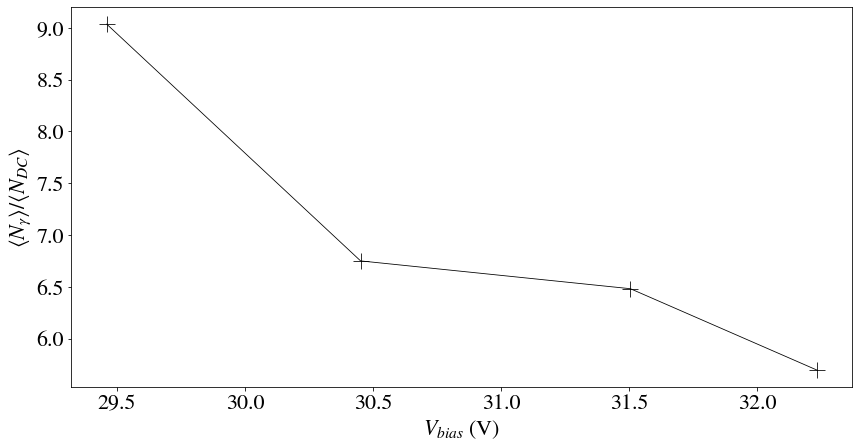

In [821]:
plt.scatter(x,SNR, marker='+', color = 'k', s = 250, lw= 0.8)
plt.plot(x,SNR,color = 'k', lw= 0.8)
plt.xlabel("$V_{bias}$ (V)")
plt.ylabel("$\\langle N_\\gamma \\rangle / \\langle N_{DC} \\rangle $")
plt.savefig(r"C:\Users\Lucas\My Drive\Fourth Year\Research Project\Data\Images\snr.jpg");